In [1]:

import torch
from numericrf import NumericRF, get_bounds

shape = [1, 3, 60, 90]
convs = torch.nn.Sequential(
                                torch.nn.Conv2d(shape[1], 16, (5,3), stride=(3,2)),
                                torch.nn.Conv2d(16, 16, (5,3), stride=2),
                                torch.nn.Conv2d(16, 16, 3, padding=1),
                                torch.nn.Conv2d(16, 8, 3),
        )



rf = NumericRF(convs, shape)


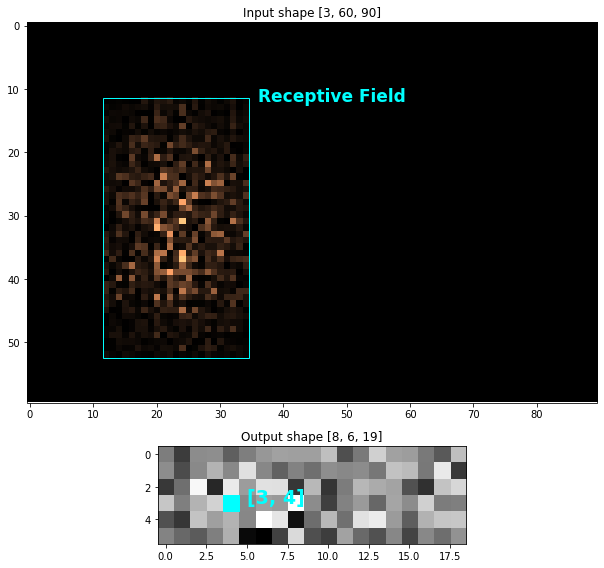

In [3]:
rf.heatmap((3,4))

rf.plot(NoneTrue)
